# 1-1 ganache를 백그라운드로 띄우고, node에서 연결하여, coinbase주소를 출력하세요.

In [1]:
%%writefile _ganacheNow.bat
node_modules\.bin\ganache-cli --unlock 0 --host "localhost" --port "8345"

Overwriting _ganacheNow.bat


In [2]:
!type _ganacheNow.bat

node_modules\.bin\ganache-cli --unlock 0 --host "localhost" --port "8345"


In [14]:
%%writefile C:\Users\swjdg\Code\201810777\src\web3test.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider('http://localhost:8345'))
web3.eth.getCoinbase().then(console.log);

Overwriting C:\Users\swjdg\Code\201810777\src\web3test.js


### 실행이 되지 않아 커멘드창에서 실행해보니 Promise pending 상태가 계속 됩니다

In [16]:
%%writefile C:\Users\swjdg\Code\201810777\src/web3accounts.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
web3.eth.getAccounts(function(err,res) { console.log("(1) accounts: " + res); } );
my=[]
web3.eth.getAccounts(function(err, res) { for (x in res) { my.push(res[x]) } } );
console.log("(2) accounts from array: " + my[0]);

Overwriting C:\Users\swjdg\Code\201810777\src/web3accounts.js


In [24]:
!node C:\Users\swjdg\Code\201810777\src/web3accounts.js

(2) accounts from array: undefined
(1) accounts: 0x2578eDfA31C282E2C8aE81a7e26387e0118C99F1,0x32B58a790a4B72D98C458F2cBb02A78f5d9Bc465,0xCc1d33fc4c6ba89054BF61F6975C2AEd45E1A6b3,0xB30174dEdF3C40b7763A83F7f397659A03857623,0x79f59cf2a96D838e92BD95D32e39E44B606671c3,0xffE6Fdb3E4F1d3a8210c94741715473d9ef5a7Aa,0x1679d733bE2e1965D1812f3D5DCB39c7449a230E,0x5be90A1890e14491c6287989ca1209f456b4dBD7,0x96CC200C5e87E49339c7b6689B52b9c4E4e1E9c1,0x1757F1dA6f0438bf862474234460E5Ccd368ce9d


In [42]:
%%writefile C:\Users\swjdg\Code\201810777\src/web3account0.js
var Web3 = require('web3');
var web3 = new Web3('http://localhost:8345');
var account0;
async function getAccount0() {
    accounts = await web3.eth.getAccounts();
    account0=accounts[0];
    console.log("local account0: " + account0);
}
getAccount0()
console.log("global account0: " + account0);

Overwriting C:\Users\swjdg\Code\201810777\src/web3account0.js


In [44]:
!node C:\Users\swjdg\Code\201810777\src/web3account0.js

global account0: undefined
local account0: 0xE00670d693eE76D46659f3C26F2Ee686943129b2


In [45]:
%%writefile C:\Users\swjdg\Code\201810777\src/web3test.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var my=web3.eth.getAccounts().then(it => { console.log(it[0]); });
my=[]

Overwriting C:\Users\swjdg\Code\201810777\src/web3test.js


In [46]:
!node C:\Users\swjdg\Code\201810777\src/web3test.js

0xE00670d693eE76D46659f3C26F2Ee686943129b2


# 1-2 문제1-1을 geth를 띄우고 실행해보세요. geth에서의 coinbase를 출력하세요.

In [6]:
!geth --exec "eth.accounts" attach http://localhost:8445

["0xc1c83babf6068f8ffcfebef8029b09f198bd8684", "0x23dd7003cc7ea4e801bdce8fd472d6f37a902324", "0xbc499689fe23bd68d0f5cc461477e945ec4fa8ab", "0x585d09bc5fb5648c6f6f9c2290aa83b8342bdd89"]


In [7]:
!geth --exec "eth.coinbase" attach http://localhost:8445

"0xc1c83babf6068f8ffcfebef8029b09f198bd8684"


# 1-3: ganache의 coinbase에서 geth의 coinbase로 1 ether를 송금해 보세요. 송금 성공이면 잔고변화를 출력하고, 실패이면 그 이유를 간단히 설명하세요.

In [63]:
!geth --exec "eth.getBalance(eth.coinbase)" attach http://localhost:8445

295000020999999980000


In [64]:
!geth --exec "eth.getBalance(eth.accounts[1])" attach http://localhost:8345

100000000000000000000


### 각각의 잔고 출력

In [70]:
!geth --exec "eth.coinbase" attach http://localhost:8445

"0xc1c83babf6068f8ffcfebef8029b09f198bd8684"


In [71]:
!geth --exec "eth.coinbase" attach http://localhost:8345

"0xe00670d693ee76d46659f3c26f2ee686943129b2"


### 각각의 coinbase의 주소 출력

In [78]:
%%writefile C:\Users\swjdg\Code\201810777\src/trans_ganache_to_geth.js
eth.sendTransaction({from:"0xe00670d693ee76d46659f3c26f2ee686943129b2", to:eth.coinbase, value:web3.toWei(1.001,"ether")})

Overwriting C:\Users\swjdg\Code\201810777\src/trans_ganache_to_geth.js


In [75]:
!geth --exec "loadScript('C:\Users\swjdg\Code\201810777\src/trans_ganache_to_geth.js')" attach http://localhost:8345

GoError: Could not read file C:UsersswjdgCode혖810777src\trans_ganache_to_geth.js: open C:UsersswjdgCode혖810777src\trans_ganache_to_geth.js: The system cannot find the path specified.
	at github.com/ethereum/go-ethereum/internal/jsre.MakeCallback.func1 (native)
	at <eval>:1:12(1)



##### 주피터 노트북에서는 오류가 생기고 커멘드창에서는 실행이 되어 캡쳐본 첨부했습니다.

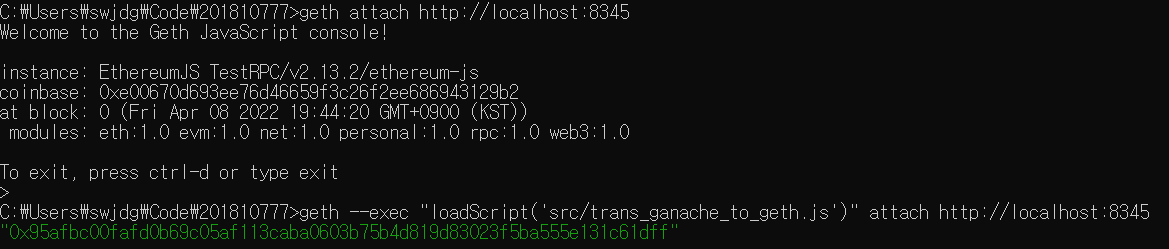

#### 송금 후 각각의 잔고 출력 결과입니다.

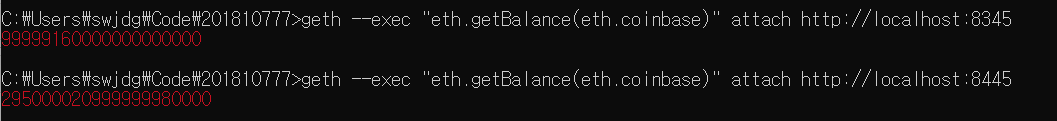

### ganache에서는 100000000000000000000에서 99999160000000000000 만큼으로 차감이 되었지만 

### geth에서는 295000020999999980000에서 295000020999999980000 인 같은 값으로 출력이되었습니다.

### 즉, ganache에서는 송금을 진행하였으나 geth에서는 수신을 하지 못한것 같습니다.

# 2-1: ganache에 연결하고, 현재 coinbase의 잔고를 ether로 출력하세요.

In [20]:
!type _ganacheNow.bat

node_modules\.bin\ganache-cli --unlock 0 --host "localhost" --port "8345"


In [61]:
%%writefile C:/Users/swjdg/Code/201810777/src/question.js
console.log(web3.fromWei(eth.getBalance(eth.coinbase),"ether"))
var a=web3.fromWei(eth.getBalance(eth.coinbase),"ether")

Overwriting C:/Users/swjdg/Code/201810777/src/question.js


In [62]:
!geth --exec "loadScript(' C:/Users/swjdg/Code/201810777/src/question.js')" attach http://localhost:8345

GoError: Could not read file  C:\Users\swjdg\Code\201810777\src\question.js: open  C:\Users\swjdg\Code\201810777\src\question.js: The filename, directory name, or volume label syntax is incorrect.
	at github.com/ethereum/go-ethereum/internal/jsre.MakeCallback.func1 (native)
	at <eval>:1:12(1)



주피터 노트북에서는 오류가 생기고 커멘드창에서는 실행이 되어 캡쳐본 첨부했습니다.

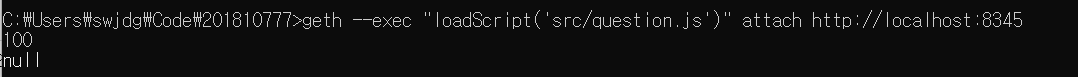

# 2-2: 현재 거래소 환전가격을 구해서 한화로 계산하여 얼마인지 출력하세요. 환전가격은 거래소 가격을 읽어서 프로그램에 코딩한다.

In [57]:
%%writefile C:\Users\swjdg\Code\201810777\src/question2.js
console.log(web3.fromWei(eth.getBalance(eth.coinbase),"ether"))
var a=web3.fromWei(eth.getBalance(eth.coinbase),"ether")
var won=4041147.52*a
console.log(won)

Overwriting C:\Users\swjdg\Code\201810777\src/question2.js


In [59]:
!geth --exec "loadScript('C:/Users/swjdg/Code/201810777/src/question2.js')" attach http://localhost:8345

100
404114752
null


주피터 노트북에서는 오류가 생기고 커멘드창에서는 실행이 되어 캡쳐본 첨부했습니다.

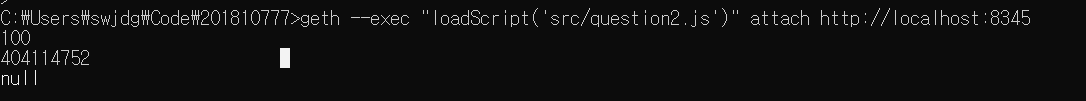